<a href="https://colab.research.google.com/github/mohamedamr13/Machine-Learning-/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import seaborn as sns 
import matplotlib as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  # Importing metrics to test accuracy


In [3]:
df = pd.read_csv('titanic-passengers.csv' , sep = ';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(df)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [16]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree2 = tree.DecisionTreeClassifier()  
clf = tree2.fit(x_train, y_train)   #fitting our model
y_pred=tree2.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))
x

score:0.7821229050279329


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,343,2,1,28.000000,0,0,13.0000
1,76,3,1,25.000000,0,0,7.6500
2,641,3,1,20.000000,0,0,7.8542
3,568,3,0,29.000000,0,4,21.0750
4,672,1,1,31.000000,1,0,52.0000
...,...,...,...,...,...,...,...
886,10,2,0,14.000000,1,0,30.0708
887,61,3,1,22.000000,0,0,7.2292
888,535,3,0,30.000000,0,0,8.6625
889,102,3,1,29.699118,0,0,7.8958


## Visualizing Tree 

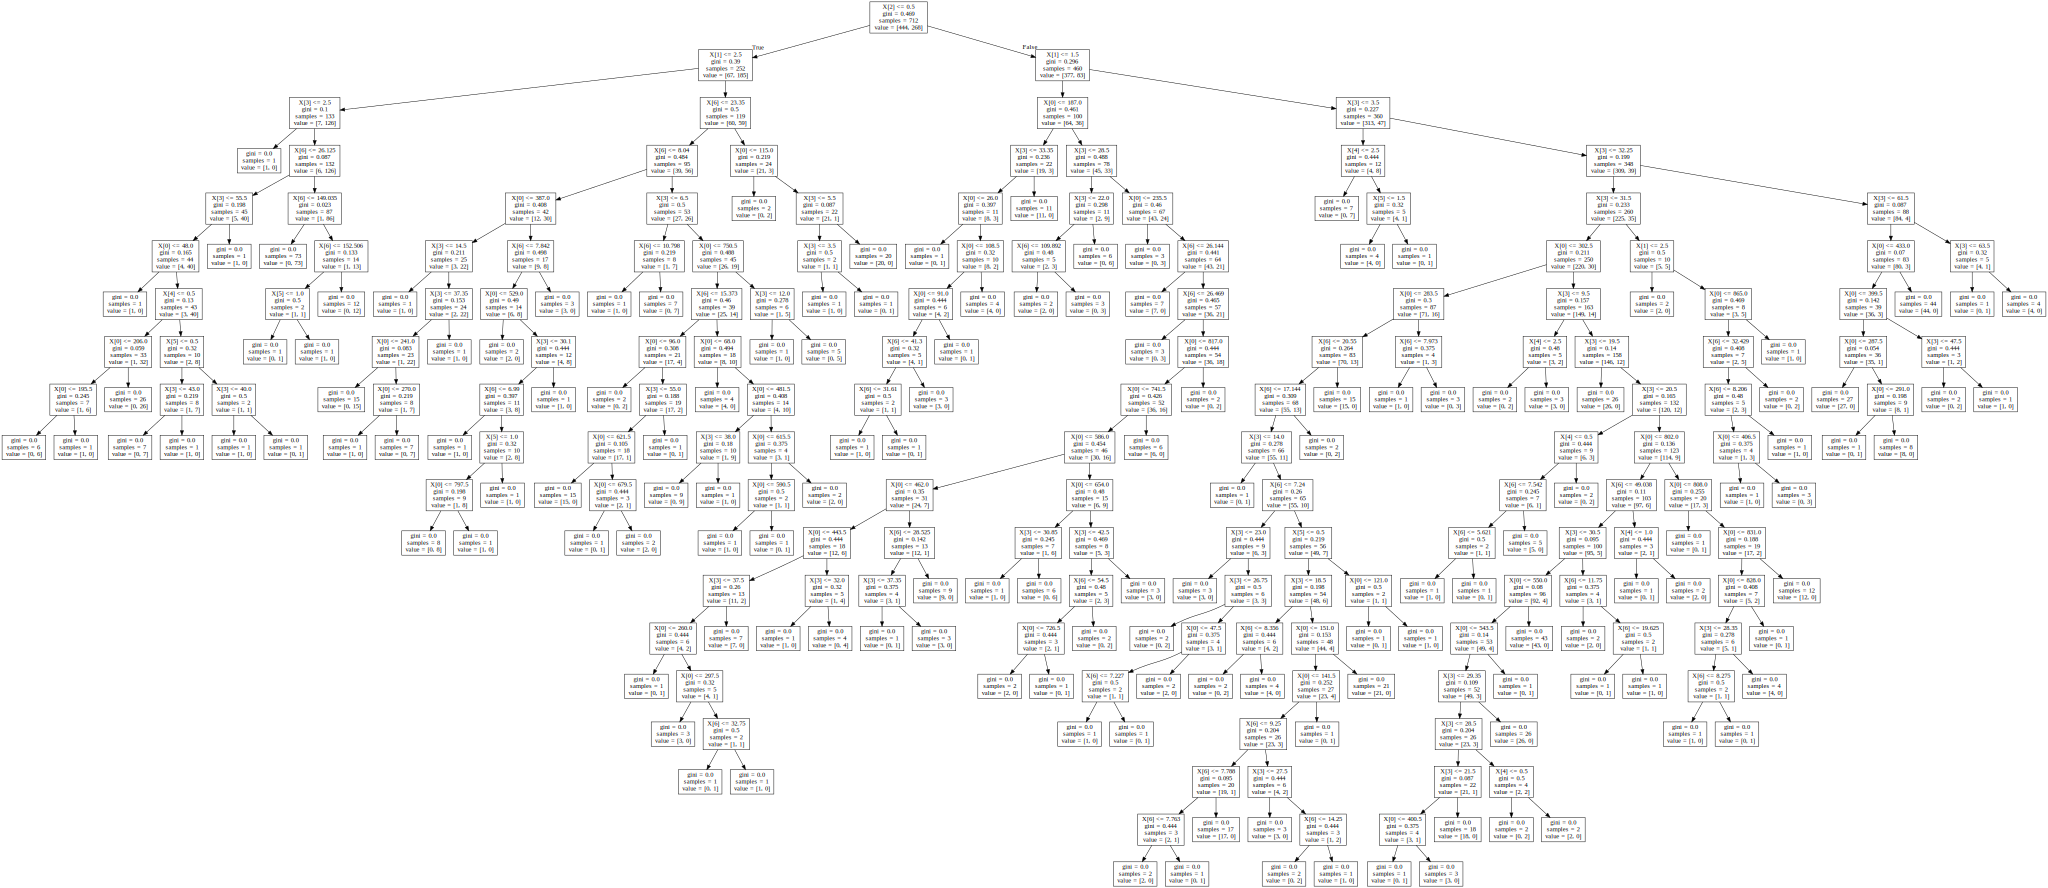

In [15]:
import graphviz
tree3 = tree.export_graphviz( clf )
graph = graphviz.Source(tree3)
graph.render("data")
graph

## Prediction


Males in a class less than 1 , aged less than 4 , with sibling count less than 2.5 are likely to survive 

# New Parameters
Minimal Cost-Complexity Pruning +
entropy cost function 

In [ ]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tree = DecisionTreeClassifier( criterion = 'entropy' , ccp_alpha = 0.01) 
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


Using Min CC Pruning shows better accuracy even while using less effective Entropy Cost function 


# Random Forest 


In [ ]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8379888268156425


Next Run with 15 trees / estimators 

In [ ]:
clf=RandomForestClassifier(n_estimators=15)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8435754189944135


About 1% increase in accuracy

In [ ]:
clf=RandomForestClassifier(n_estimators=30)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8435754189944135


No change in accuracy 